<a href="https://colab.research.google.com/github/songcicada/tunneling/blob/master/note01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python control systems library

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE363: Automatic control, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

This note provides a quick introduction to the python control systems library (https://python-control.readthedocs.io/en/0.8.2/intro.html) developed by Richard Murray at California Institute of Technology (CalTech).

Installation is quite simple.

In [1]:
!pip install control

     |████████████████████████████████| 184kB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/62/70/b3/4ff8c0348172e6b1fa8c9c2f1388e80d3e86f15f27d63c2e23
Successfully built control


Importing required modules.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

Linear systems can be created in a variety of ways. First by transfer functions. We are going to create

$$
  G(s) = \frac{1}{s+1}
$$

In [3]:
num1 = np.array([1])
den1 = np.array([1, 1])
G_1 = tf(num1, den1)
print(G_1)


  1
-----
s + 1



Step responses and impulse responses.

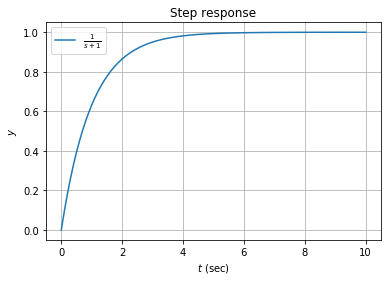

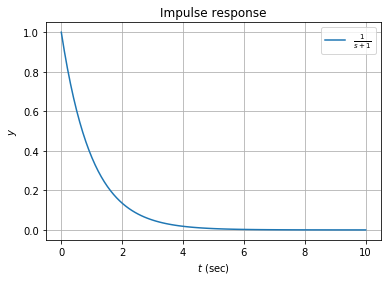

In [0]:
t = np.linspace(0, 10, 100)
y_1, t_1 = step(G_1, t)
y_1i, t_1i = impulse(G_1, t)

plt.figure()
plt.plot(t_1, y_1, label=r'$\frac{1}{s+1}$')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.title('Step response')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(t_1i, y_1i, label=r'$\frac{1}{s+1}$')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.title('Impulse response')
plt.legend()
plt.grid()
plt.show()

Comparing different bandwidth parameters and DC gains.

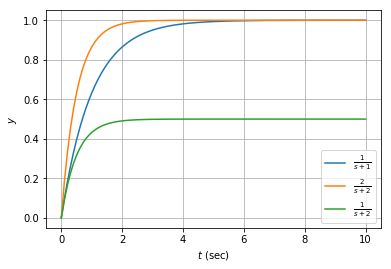

In [0]:
num2 = np.array([2])
den2 = np.array([1, 2])
G_2 = tf(num2, den2)

num3 = np.array([1])
den3 = np.array([1, 2])
G_3 = tf(num3, den3)

y_2, t_2 = step(G_2, t)
y_3, t_3 = step(G_3, t)

plt.figure()
plt.plot(t_1, y_1, label=r'$\frac{1}{s+1}$')
plt.plot(t_2, y_2, label=r'$\frac{2}{s+2}$')
plt.plot(t_3, y_3, label=r'$\frac{1}{s+2}$')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

Linear systems can also be created by state-space descriptions. Let us first create a second order linear system in a transfer function form.


     1
-----------
s^2 + s + 1



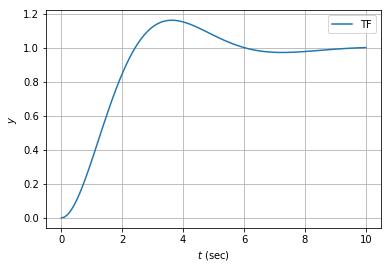

In [0]:
num = np.array([1])
den = np.array([1, 1, 1])
G_tf = tf(num, den)

print(G_tf)

t = np.linspace(0, 10, 100)

y_tf, t_tf = step(G_tf, t)

plt.figure()
plt.plot(t_tf, y_tf, label='TF')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

So the transfer function was

$$
  G(s) = \frac{Y(s)}{U(s)} = \frac{1}{s^2 + s + 1}
$$

and the relevant differential equation is

$$
  \ddot{y} + \dot{y} + y = u
$$

which is equivalent to

\begin{align*}
  \dot{x} &= \bmat{-1 & -1 \\ 1 & 0} x + \bmat{1 \\ 0}u \\
  y &= \bmat{0 & 1}x
\end{align*}

with the state variable being $x = \bmat{\dot{y}^T, y^T}^T$.


In [0]:
A = np.array([[-1, -1], [1, 0]])
B = np.array([[1], [0]])
C = np.array([0, 1])
D = np.array([0])
G_ss = ss(A, B, C, D)

print (G_ss)

A = [[-1. -1.]
 [ 1.  0.]]

B = [[1.]
 [0.]]

C = [[0. 1.]]

D = [[0.]]



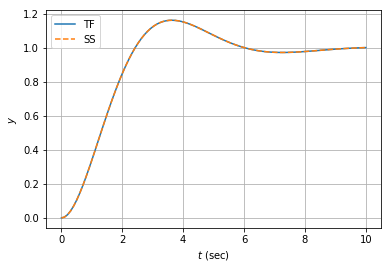

In [0]:
y_ss, t_ss = step(G_ss, t)

plt.figure()
plt.plot(t_tf, y_tf, label='TF')
plt.plot(t_ss, y_ss, '--', label='SS')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

In fact they can go back and forth by `tf2ss` or `ss2tf`.

In [0]:
print (ss2tf(G_ss))


     1
-----------
s^2 + s + 1



In [0]:
print (tf2ss(G_tf))

A = [[-1. -1.]
 [ 1.  0.]]

B = [[1.]
 [0.]]

C = [[0. 1.]]

D = [[0.]]



Parallel or serial connections can be intuitively computed.

In [0]:
print (f'G_1={G_1}')
print (f'G_2={G_2}')
print (f'G_1+G_2={G_1+G_2}')
print (f'G_1 G_2={G_1*G_2}')

G_1=
  1
-----
s + 1

G_2=
  2
-----
s + 2

G_1+G_2=
   3 s + 4
-------------
s^2 + 3 s + 2

G_1 G_2=
      2
-------------
s^2 + 3 s + 2



Feedback connections:

In [0]:
K = 2
G_f = feedback(G_1,K,-1) 
G_f = (1/dcgain(G_f))*G_f
print (G_f)


  3
-----
s + 3



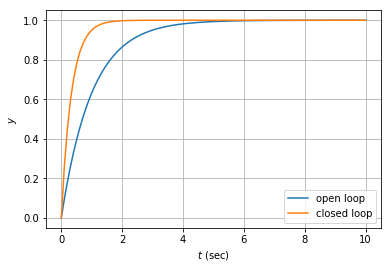

In [0]:
y_f, t_f = step(G_f, t)

plt.figure()
plt.plot(t_1, y_1, label='open loop')
plt.plot(t_f, y_f, label='closed loop')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

Second order systems.

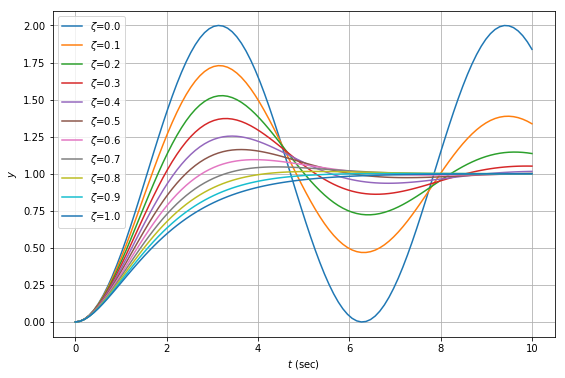

In [0]:
omega = 1
zeta = np.linspace(0, 1, 11)
t = np.linspace(0, 10, 100) 

np.set_printoptions(precision=1)
plt.figure(figsize=(9,6))
for z in zeta:
  num = omega**2
  den = np.array([1, 2*z*omega, omega**2])
  Gs = tf(num,den)
  ys, ts = step(Gs, t)
  plt.plot(ts, ys, label=rf'$\zeta$={z:3.1f}')
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.legend()
plt.grid()
plt.show()

A second order system with nonempty zeros.

poles at [-0.7+0.7j -0.7-0.7j]
zeros at [-0.+1.j  0.-1.j]


(array([-0.7+0.7j, -0.7-0.7j]), array([-0.+1.j,  0.-1.j]))

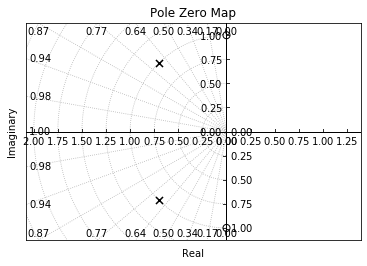

In [0]:
omega = 1
zeta = 0.7
num = np.array([1, 0, omega**2])
den = np.array([1, 2*zeta*omega, omega**2])
Gs = tf(num,den)

print(f'poles at {pole(Gs)}')
print(f'zeros at {zero(Gs)}')

pzmap(Gs, grid=True)

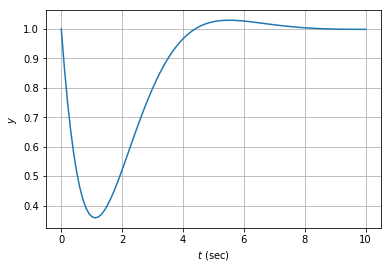

In [0]:
t = np.linspace(0, 10, 100) 
yy, tt = step(Gs)
plt.figure()
plt.plot(tt, yy)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$y$')
plt.grid()
plt.show()